In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

**Importing the dataset**

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning-assigments/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
#Encoding the gender column
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

**Splitting the dataset into the Training set and Test set**

In [18]:
X = df.iloc[:,:-1]       
y = df["Purchased"].values  
X.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000


In [19]:
df.drop(["User ID"],axis=1,inplace=True)

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialisation 
X_train = scaler.fit_transform(X_train) # find the values of mu and sigma
X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()
# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

DecisionTreeClassifier()

**Predicting the Test set results**

Test set accuracy: 0.81
Test set auc: 0.80
Train set AUC :  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


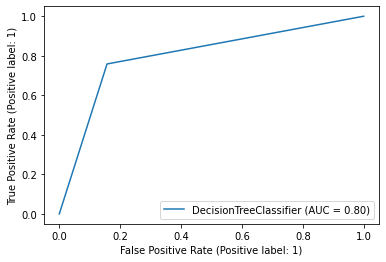

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily
# Predict test set labels
y_pred = dt.predict(X_test) 
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)

In [24]:
# Reducing the overfitting model 

##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.840625  Cross val score :  0.825
Depth  :  2  Training Accuracy :  0.91875  Cross val score :  0.8949999999999999
Depth  :  3  Training Accuracy :  0.91875  Cross val score :  0.85
Depth  :  4  Training Accuracy :  0.9375  Cross val score :  0.86
Depth  :  5  Training Accuracy :  0.946875  Cross val score :  0.8525
Depth  :  6  Training Accuracy :  0.971875  Cross val score :  0.8375
Depth  :  7  Training Accuracy :  0.990625  Cross val score :  0.8425
Depth  :  8  Training Accuracy :  0.990625  Cross val score :  0.8324999999999999
Depth  :  9  Training Accuracy :  0.996875  Cross val score :  0.835
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.8425
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.8299999999999998


In [25]:
#depth=2 we get a better generalized model 
from sklearn.tree import DecisionTreeClassifier
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth=2)
# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

DecisionTreeClassifier(max_depth=2)

Test set accuracy: 0.88
Test set auc: 0.87
Train set AUC :  0.9231817407596662


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


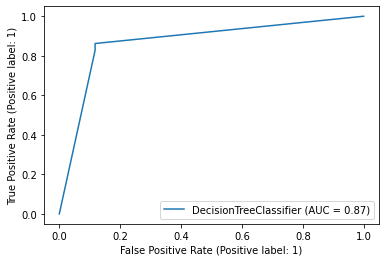

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily
# Predict test set labels
y_pred = dt.predict(X_test) 
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train))
print("Train set AUC : ", acc)

**Making the Confusion Matrix**

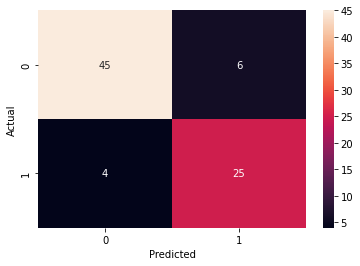

In [27]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)